In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file = uproot.open("./refined_ttbar.root:Data")

In [3]:
%%time
features = file["features"].array()
trk_label = file["trk_label"].array()
jet_label = file["jet_label"].array()
trk_ID = file["trk_ID"].array()
Event_ID = file["Event_ID"].array()

CPU times: user 2min 47s, sys: 51 s, total: 3min 38s
Wall time: 3min 47s


In [30]:
cutoff = 1000000
jet_pt = np.array(features[0:cutoff,0])
jet_eta = np.array(features[0:cutoff,1])
jet_phi = np.array(features[0:cutoff,2])
trk_p_over_q = np.array(features[0:cutoff,3])
trk_eta = np.array(features[0:cutoff,4])
trk_phi = np.array(features[0:cutoff,5])
trk_d0 = np.array(features[0:cutoff,6])
trk_d0_sig = trk_d0 / np.array(features[0:cutoff,7])
trk_z0 = np.array(features[0:cutoff,8])
trk_z0_sig = trk_z0 / np.array(features[0:cutoff,9])
trk_nPixHits = np.array(features[0:cutoff,10])
trk_nSharedPixHits = np.array(features[0:cutoff,11])
trk_nSplitPixHits = np.array(features[0:cutoff,12])
trk_nSCTHits = np.array(features[0:cutoff,13])
trk_nSCTSharedHits = np.array(features[0:cutoff,14])
trk_nIBLHits = np.array(features[0:cutoff,15])
trk_nIBLSharedHits = np.array(features[0:cutoff,16])
trk_nIBLSplitHits = np.array(features[0:cutoff,17])
trk_nBLHits = np.array(features[0:cutoff,18])

bkg_idx = np.array(np.where(trk_label[0:cutoff] == 1)).flatten()
sig_idx = np.array(np.where((trk_label[0:cutoff] == 0) | (trk_label[0:cutoff] == -999))).flatten()

print("Number of tracks: ", len(trk_label))

Number of tracks:  153770400


In [31]:
def plot_hist(var, scale, Bins, Range, Title, Units,log=False):
    plt.title(Title,fontsize = 15)
    plt.hist(var[sig_idx]/scale,bins=Bins,range=Range,histtype=u'step',density=True)
    plt.hist(var[bkg_idx]/scale,bins=Bins,range=Range,histtype=u'step',density=True)
    plt.legend(["sig","bkg"])
    plt.xlabel(Units,loc='right')
    if log==True:
        plt.yscale('log')
    plt.show()

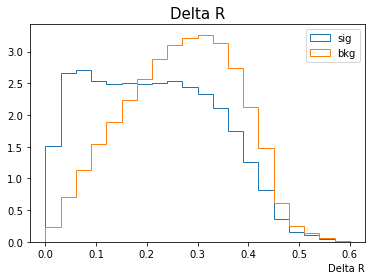

In [32]:
delta_R = np.sqrt(np.square(np.subtract(jet_eta,trk_eta))+np.square(np.subtract(jet_phi,trk_phi)))
plot_hist(delta_R,1,20,(0,0.6),"Delta R", "Delta R")

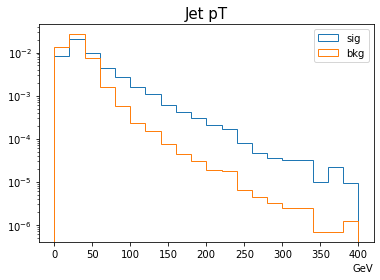

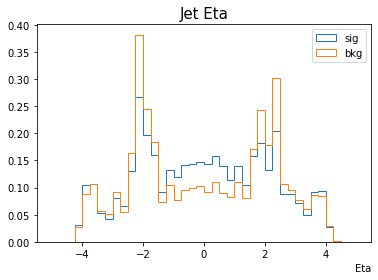

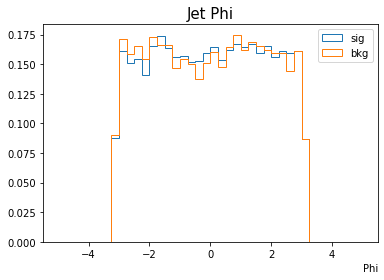

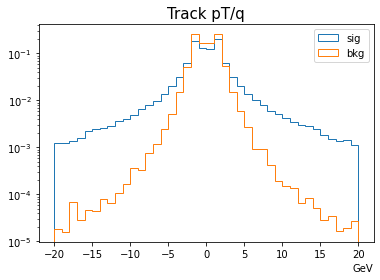

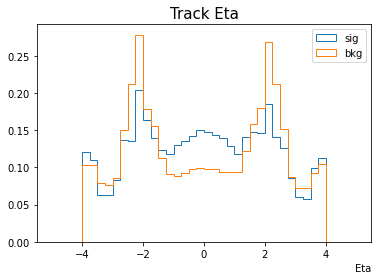

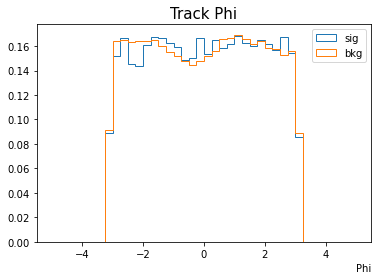

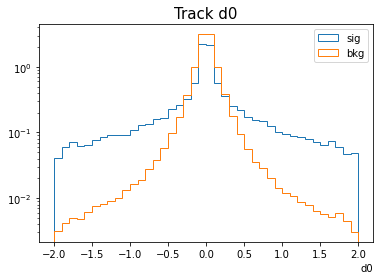

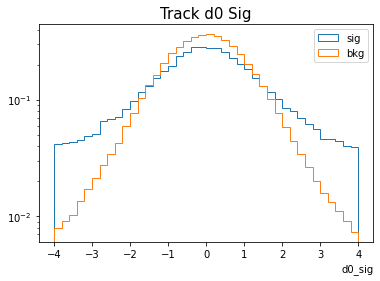

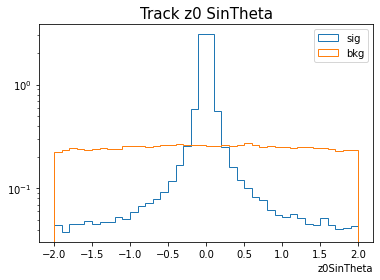

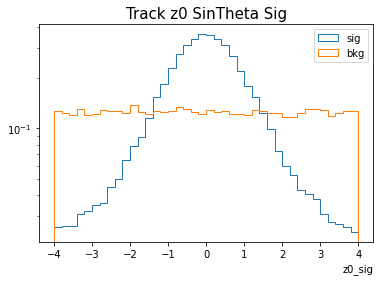

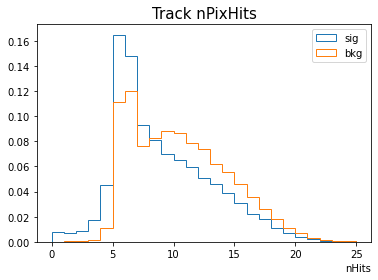

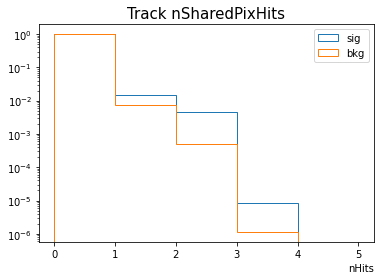

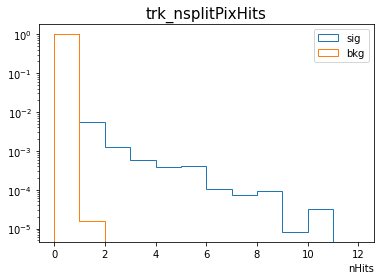

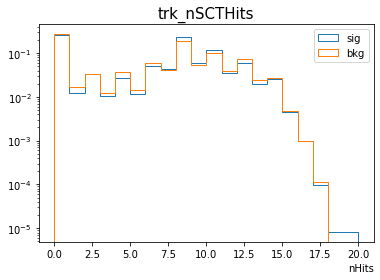

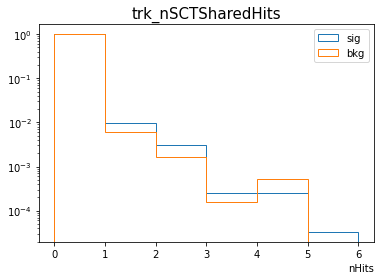

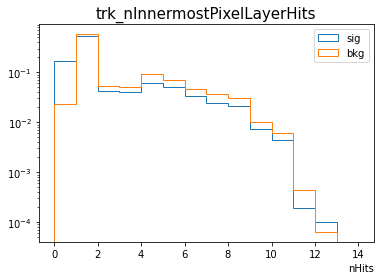

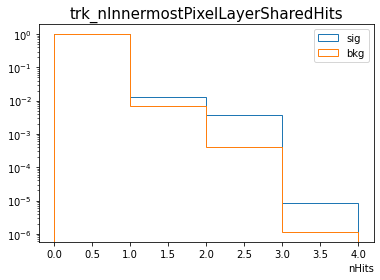

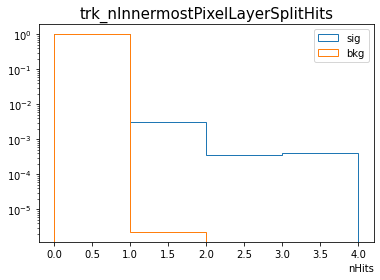

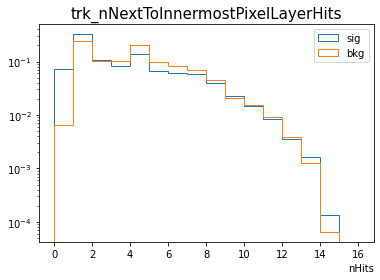

In [33]:
plot_hist(jet_pt, 1000, 20, (0,400), "Jet pT", "GeV",log=True)
plot_hist(jet_eta, 1, 40, (-5,5), "Jet Eta", "Eta")
plot_hist(jet_phi, 1, 40, (-5,5), "Jet Phi", "Phi")
plot_hist(trk_p_over_q, 1000, 40, (-20,20), "Track pT/q", "GeV",log=True)
plot_hist(trk_eta, 1, 40, (-5,5), "Track Eta", "Eta")
plot_hist(trk_phi, 1, 40, (-5,5), "Track Phi", "Phi")
plot_hist(trk_d0, 1, 40, (-2,2), "Track d0", "d0",log=True)
plot_hist(trk_d0_sig, 1, 40, (-4,4), "Track d0 Sig", "d0_sig",log=True)
plot_hist(trk_z0, 1, 40, (-2,2), "Track z0 SinTheta", "z0SinTheta", log=True)
plot_hist(trk_z0_sig, 1, 40, (-4,4), "Track z0 SinTheta Sig", "z0_sig",log=True)
plot_hist(trk_nPixHits, 1, 25, (0,25), "Track nPixHits", "nHits")
plot_hist(trk_nSharedPixHits, 1, 5, (0,5), "Track nSharedPixHits", "nHits",log=True)
plot_hist(trk_nSplitPixHits, 1, 12, (0,12), "trk_nsplitPixHits", "nHits",log=True)
plot_hist(trk_nSCTHits, 1, 20, (0,20), "trk_nSCTHits", "nHits",log=True)
plot_hist(trk_nSCTSharedHits, 1, 6, (0,6), "trk_nSCTSharedHits", "nHits",log=True)
plot_hist(trk_nIBLHits, 1, 14, (0,14), "trk_nInnermostPixelLayerHits", "nHits",log=True)
plot_hist(trk_nIBLSharedHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSharedHits", "nHits",log=True)
plot_hist(trk_nIBLSplitHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSplitHits", "nHits",log=True)
plot_hist(trk_nBLHits, 1, 16, (0,16), "trk_nNextToInnermostPixelLayerHits", "nHits",log=True)

In [34]:
eta_idx = np.where(np.abs(jet_eta)<1)
sig_eta_idx = np.intersect1d(eta_idx,sig_idx)
bkg_eta_idx = np.intersect1d(eta_idx,bkg_idx)

In [35]:
def plot_hist_eta(var, scale, Bins, Range, Title, Units,log=False):
    plt.title(Title,fontsize = 15)
    plt.hist(var[sig_eta_idx]/scale,bins=Bins,range=Range,histtype=u'step',density=True)
    plt.hist(var[bkg_eta_idx]/scale,bins=Bins,range=Range,histtype=u'step',density=True)
    plt.legend(["sig","bkg"])
    plt.xlabel(Units,loc='right')
    if log==True:
        plt.yscale('log')
    plt.show()

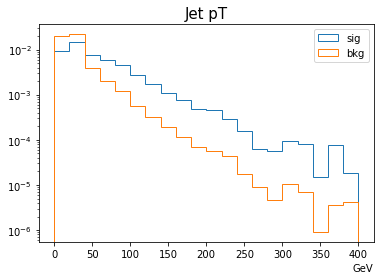

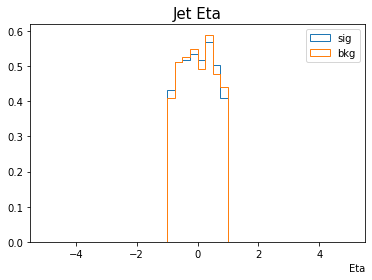

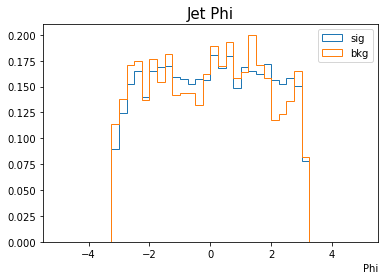

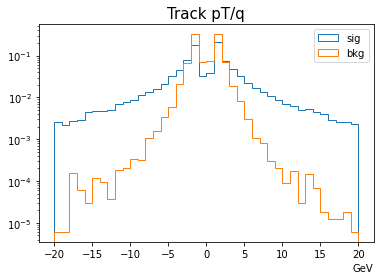

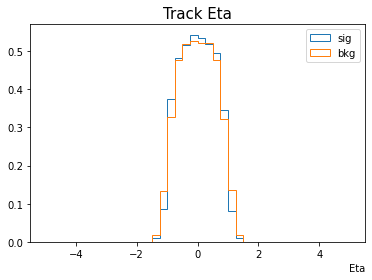

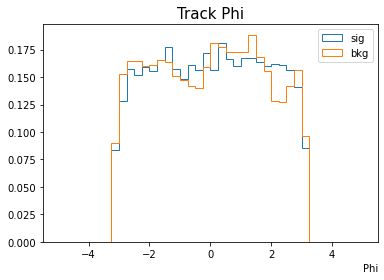

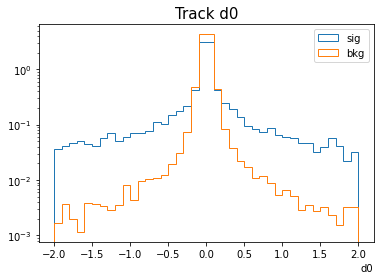

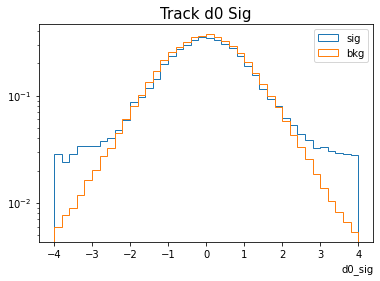

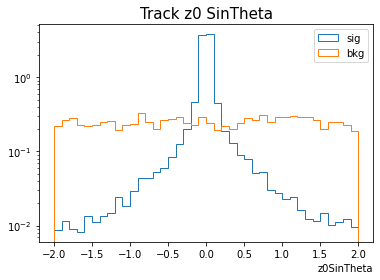

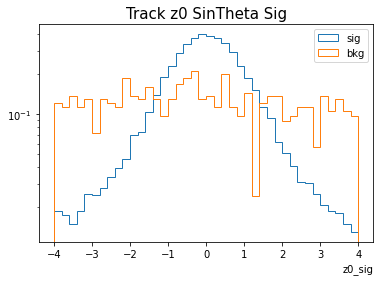

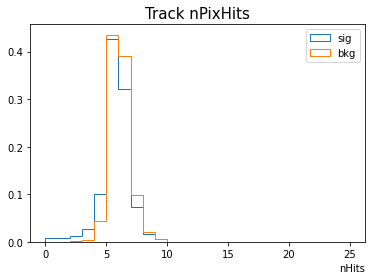

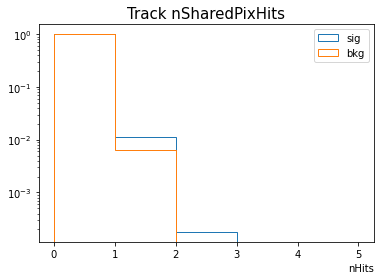

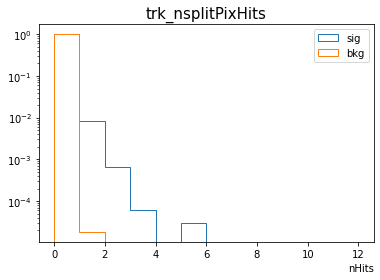

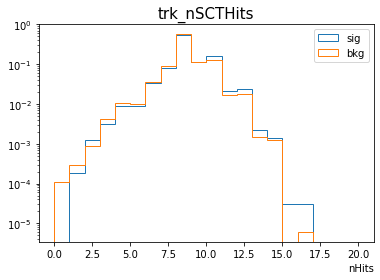

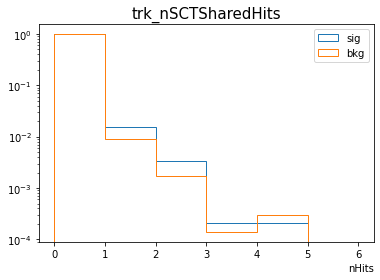

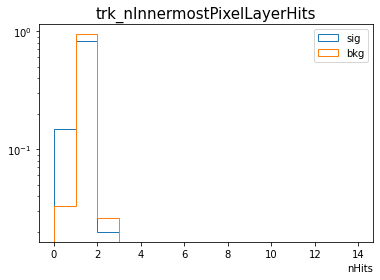

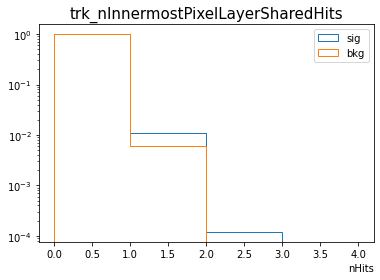

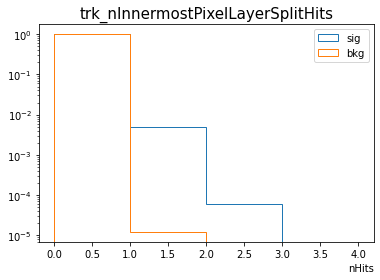

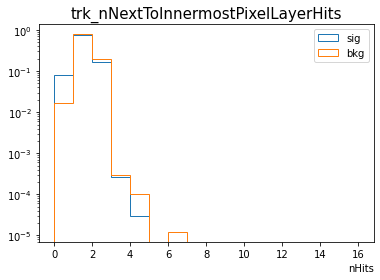

In [36]:
plot_hist_eta(jet_pt, 1000, 20, (0,400), "Jet pT", "GeV",log=True)
plot_hist_eta(jet_eta, 1, 40, (-5,5), "Jet Eta", "Eta")
plot_hist_eta(jet_phi, 1, 40, (-5,5), "Jet Phi", "Phi")
plot_hist_eta(trk_p_over_q, 1000, 40, (-20,20), "Track pT/q", "GeV",log=True)
plot_hist_eta(trk_eta, 1, 40, (-5,5), "Track Eta", "Eta")
plot_hist_eta(trk_phi, 1, 40, (-5,5), "Track Phi", "Phi")
plot_hist_eta(trk_d0, 1, 40, (-2,2), "Track d0", "d0",log=True)
plot_hist_eta(trk_d0_sig, 1, 40, (-4,4), "Track d0 Sig", "d0_sig",log=True)
plot_hist_eta(trk_z0, 1, 40, (-2,2), "Track z0 SinTheta", "z0SinTheta", log=True)
plot_hist_eta(trk_z0_sig, 1, 40, (-4,4), "Track z0 SinTheta Sig", "z0_sig",log=True)
plot_hist_eta(trk_nPixHits, 1, 25, (0,25), "Track nPixHits", "nHits")
plot_hist_eta(trk_nSharedPixHits, 1, 5, (0,5), "Track nSharedPixHits", "nHits",log=True)
plot_hist_eta(trk_nSplitPixHits, 1, 12, (0,12), "trk_nsplitPixHits", "nHits",log=True)
plot_hist_eta(trk_nSCTHits, 1, 20, (0,20), "trk_nSCTHits", "nHits",log=True)
plot_hist_eta(trk_nSCTSharedHits, 1, 6, (0,6), "trk_nSCTSharedHits", "nHits",log=True)
plot_hist_eta(trk_nIBLHits, 1, 14, (0,14), "trk_nInnermostPixelLayerHits", "nHits",log=True)
plot_hist_eta(trk_nIBLSharedHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSharedHits", "nHits",log=True)
plot_hist_eta(trk_nIBLSplitHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSplitHits", "nHits",log=True)
plot_hist_eta(trk_nBLHits, 1, 16, (0,16), "trk_nNextToInnermostPixelLayerHits", "nHits",log=True)

In [37]:
eta_idx = np.where((np.abs(jet_eta)>1) & (np.abs(jet_eta)<2.4))
sig_eta_idx = np.intersect1d(eta_idx,sig_idx)
bkg_eta_idx = np.intersect1d(eta_idx,bkg_idx)

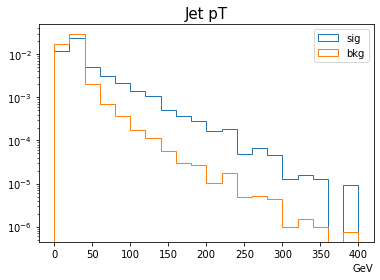

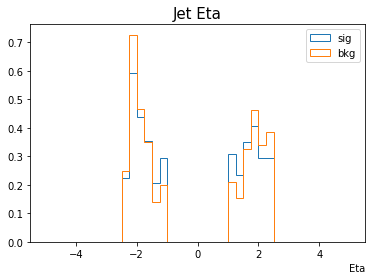

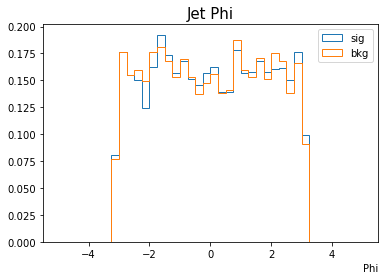

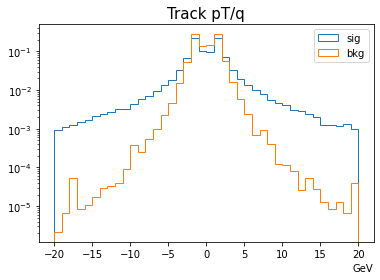

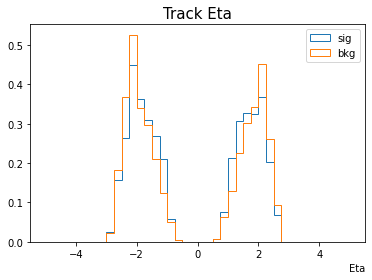

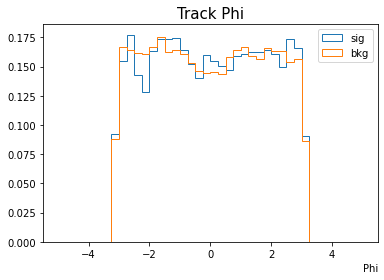

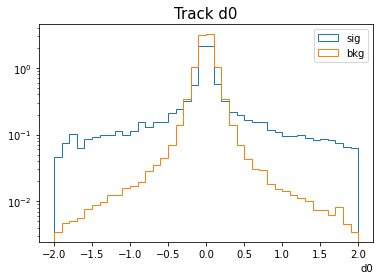

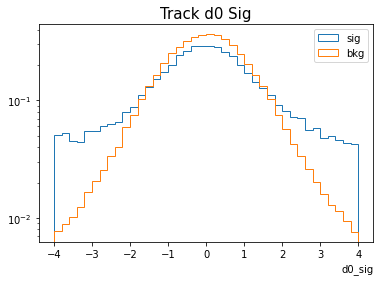

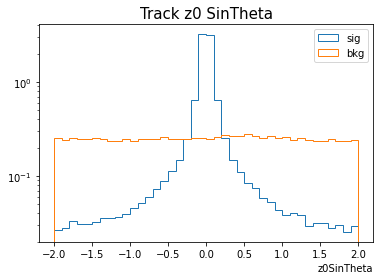

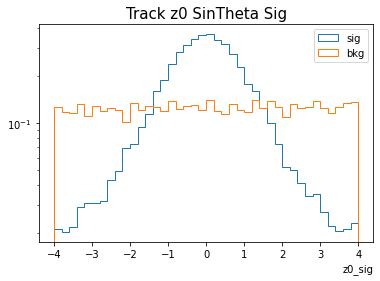

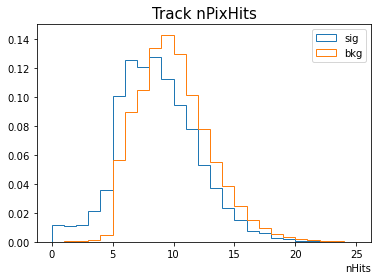

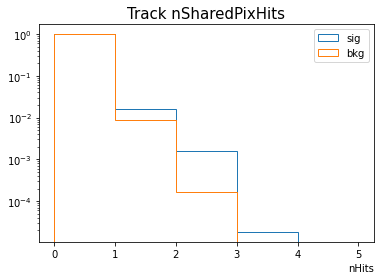

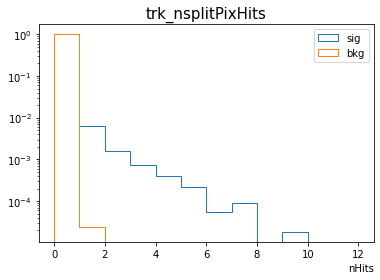

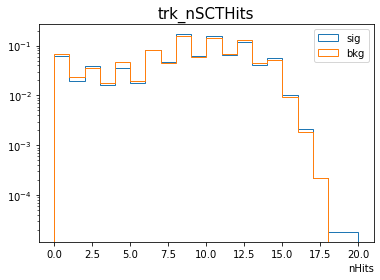

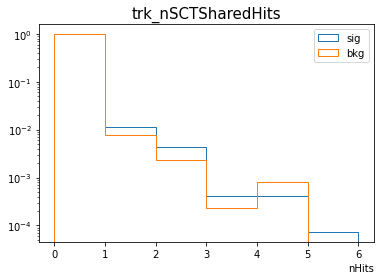

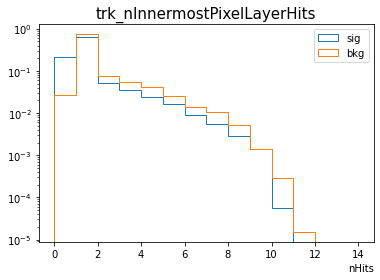

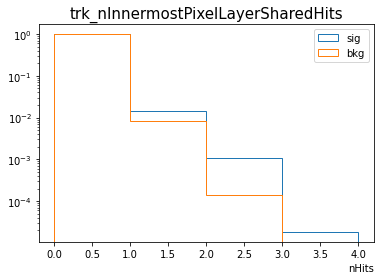

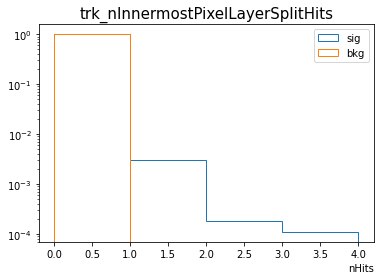

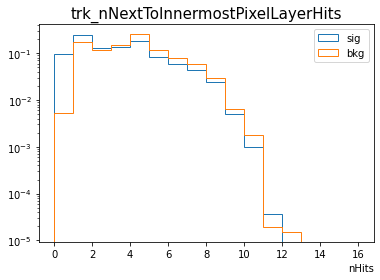

In [38]:
plot_hist_eta(jet_pt, 1000, 20, (0,400), "Jet pT", "GeV",log=True)
plot_hist_eta(jet_eta, 1, 40, (-5,5), "Jet Eta", "Eta")
plot_hist_eta(jet_phi, 1, 40, (-5,5), "Jet Phi", "Phi")
plot_hist_eta(trk_p_over_q, 1000, 40, (-20,20), "Track pT/q", "GeV",log=True)
plot_hist_eta(trk_eta, 1, 40, (-5,5), "Track Eta", "Eta")
plot_hist_eta(trk_phi, 1, 40, (-5,5), "Track Phi", "Phi")
plot_hist_eta(trk_d0, 1, 40, (-2,2), "Track d0", "d0",log=True)
plot_hist_eta(trk_d0_sig, 1, 40, (-4,4), "Track d0 Sig", "d0_sig",log=True)
plot_hist_eta(trk_z0, 1, 40, (-2,2), "Track z0 SinTheta", "z0SinTheta", log=True)
plot_hist_eta(trk_z0_sig, 1, 40, (-4,4), "Track z0 SinTheta Sig", "z0_sig",log=True)
plot_hist_eta(trk_nPixHits, 1, 25, (0,25), "Track nPixHits", "nHits")
plot_hist_eta(trk_nSharedPixHits, 1, 5, (0,5), "Track nSharedPixHits", "nHits",log=True)
plot_hist_eta(trk_nSplitPixHits, 1, 12, (0,12), "trk_nsplitPixHits", "nHits",log=True)
plot_hist_eta(trk_nSCTHits, 1, 20, (0,20), "trk_nSCTHits", "nHits",log=True)
plot_hist_eta(trk_nSCTSharedHits, 1, 6, (0,6), "trk_nSCTSharedHits", "nHits",log=True)
plot_hist_eta(trk_nIBLHits, 1, 14, (0,14), "trk_nInnermostPixelLayerHits", "nHits",log=True)
plot_hist_eta(trk_nIBLSharedHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSharedHits", "nHits",log=True)
plot_hist_eta(trk_nIBLSplitHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSplitHits", "nHits",log=True)
plot_hist_eta(trk_nBLHits, 1, 16, (0,16), "trk_nNextToInnermostPixelLayerHits", "nHits",log=True)

In [39]:
eta_idx = np.where((np.abs(jet_eta)>2.4) & (np.abs(jet_eta)<4))
sig_eta_idx = np.intersect1d(eta_idx,sig_idx)
bkg_eta_idx = np.intersect1d(eta_idx,bkg_idx)

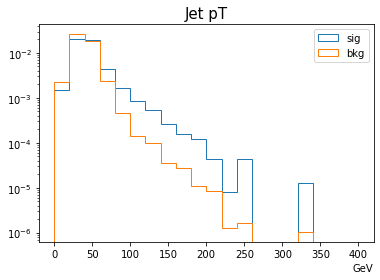

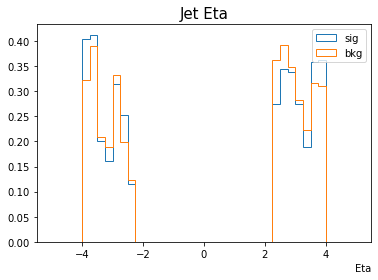

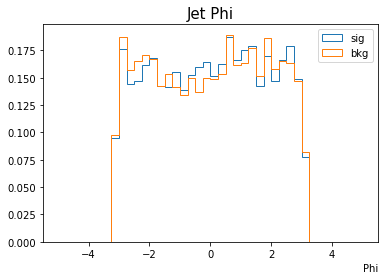

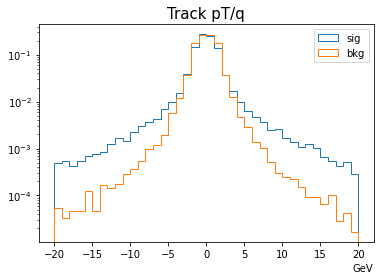

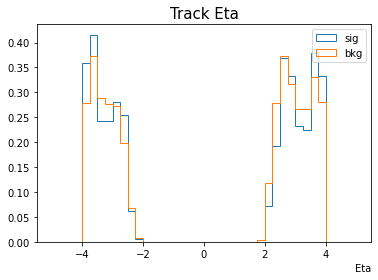

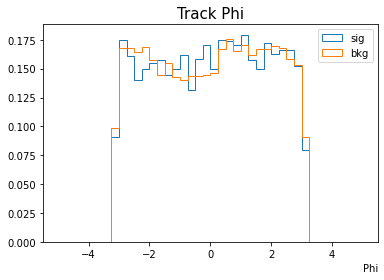

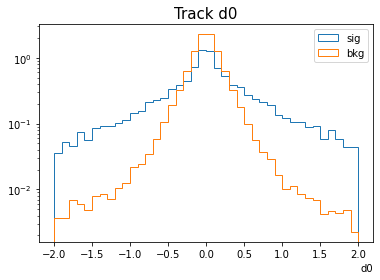

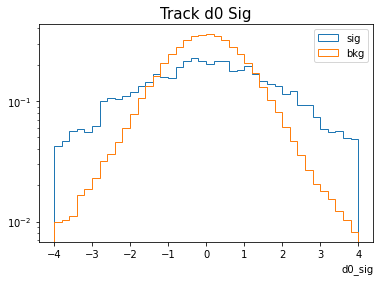

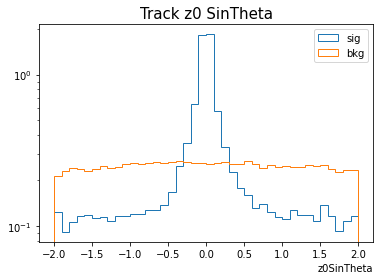

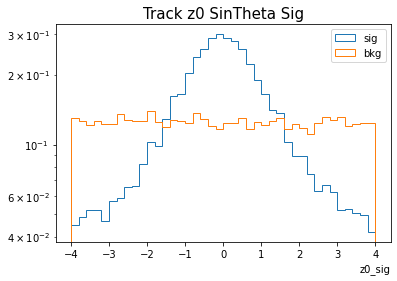

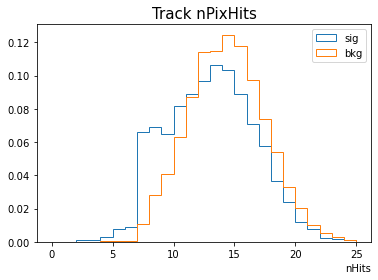

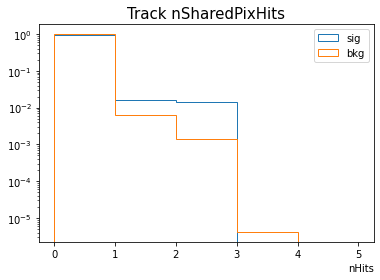

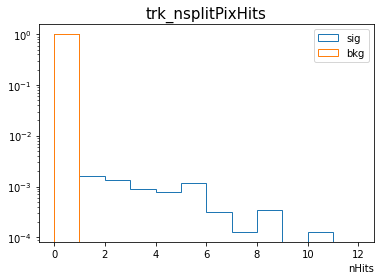

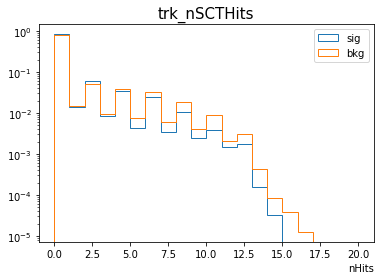

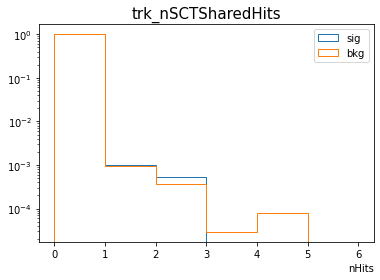

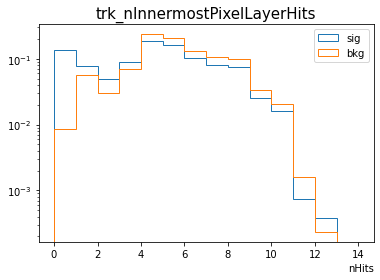

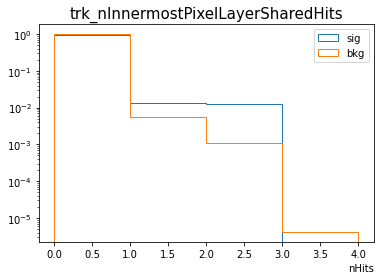

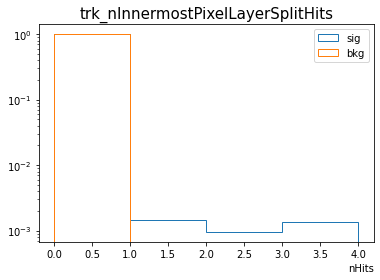

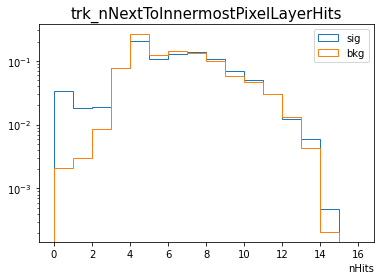

In [40]:
plot_hist_eta(jet_pt, 1000, 20, (0,400), "Jet pT", "GeV",log=True)
plot_hist_eta(jet_eta, 1, 40, (-5,5), "Jet Eta", "Eta")
plot_hist_eta(jet_phi, 1, 40, (-5,5), "Jet Phi", "Phi")
plot_hist_eta(trk_p_over_q, 1000, 40, (-20,20), "Track pT/q", "GeV",log=True)
plot_hist_eta(trk_eta, 1, 40, (-5,5), "Track Eta", "Eta")
plot_hist_eta(trk_phi, 1, 40, (-5,5), "Track Phi", "Phi")
plot_hist_eta(trk_d0, 1, 40, (-2,2), "Track d0", "d0",log=True)
plot_hist_eta(trk_d0_sig, 1, 40, (-4,4), "Track d0 Sig", "d0_sig",log=True)
plot_hist_eta(trk_z0, 1, 40, (-2,2), "Track z0 SinTheta", "z0SinTheta", log=True)
plot_hist_eta(trk_z0_sig, 1, 40, (-4,4), "Track z0 SinTheta Sig", "z0_sig",log=True)
plot_hist_eta(trk_nPixHits, 1, 25, (0,25), "Track nPixHits", "nHits")
plot_hist_eta(trk_nSharedPixHits, 1, 5, (0,5), "Track nSharedPixHits", "nHits",log=True)
plot_hist_eta(trk_nSplitPixHits, 1, 12, (0,12), "trk_nsplitPixHits", "nHits",log=True)
plot_hist_eta(trk_nSCTHits, 1, 20, (0,20), "trk_nSCTHits", "nHits",log=True)
plot_hist_eta(trk_nSCTSharedHits, 1, 6, (0,6), "trk_nSCTSharedHits", "nHits",log=True)
plot_hist_eta(trk_nIBLHits, 1, 14, (0,14), "trk_nInnermostPixelLayerHits", "nHits",log=True)
plot_hist_eta(trk_nIBLSharedHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSharedHits", "nHits",log=True)
plot_hist_eta(trk_nIBLSplitHits, 1, 4, (0,4), "trk_nInnermostPixelLayerSplitHits", "nHits",log=True)
plot_hist_eta(trk_nBLHits, 1, 16, (0,16), "trk_nNextToInnermostPixelLayerHits", "nHits",log=True)